In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import contextily as ctx
import folium
from folium import Marker
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [2]:
data = pd.read_csv('/Users/cyberhbliu/Desktop/30daymapchallenge/11 retro/Global Missing Migrants Dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [3]:
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(',', expand=True)
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   
3      North America            Mexico             1.0   
4             Europe             Sudan             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   
3                    0  ...                1                   0   
4                    2  ...                1                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                        NaN   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  
3           Northern America  31.506777 -109.315632  
4            Northern Europe  59.155100   28.000000  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [6]:
np.random.seed(10)
columns_to_include = [col for col in data.columns if col not in ['Latitude', 'Longitude']]
correlation_matrix = data[columns_to_include].corr()
correlation_matrix

/var/folders/rp/0t393qy94k3_n1h8yry822hr0000gn/T/ipykernel_29556/324194805.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[columns_to_include].corr()


Incident year  Number of Dead  \
Incident year                             1.000000       -0.067944   
Number of Dead                           -0.067944        1.000000   
Minimum Estimated Number of Missing      -0.055558        0.241459   
Total Number of Dead and Missing         -0.077348        0.684555   
Number of Survivors                      -0.044353        0.101930   
Number of Females                        -0.015575        0.163241   
Number of Males                           0.027849        0.251530   
Number of Children                       -0.030011        0.078438   

                                     Minimum Estimated Number of Missing  \
Incident year                                                  -0.055558   
Number of Dead                                                  0.241459   
Minimum Estimated Number of Missing                             1.000000   
Total Number of Dead and Missing                                0.884053   
Number of Survivors                                             0.131206   
Number of Females                                               0.147635   
Number of Males                                                 0.172177   
Number of Children                                              0.453512   

                                     Total Number of Dead and Missing  \
Incident year                                               -0.077348   
Number of Dead                                               0.684555   
Minimum Estimated Number of Missing                          0.884053   
Total Number of Dead and Missing                             1.000000   
Number of Survivors                                          0.148230   
Number of Females                                            0.186118   
Number of Males                                              0.230411   
Number of Children                                           0.392485   

                                     Number of Survivors  Number of Females  \
Incident year                                  -0.044353          -0.015575   
Number of Dead                                  0.101930           0.163241   
Minimum Estimated Number of Missing             0.131206           0.147635   
Total Number of Dead and Missing                0.148230           0.186118   
Number of Survivors                             1.000000           0.029244   
Number of Females                               0.029244           1.000000   
Number of Males                                 0.059640           0.217927   
Number of Children                              0.024462           0.120186   

                                     Number of Males  Number of Children  
Incident year                               0.027849           -0.030011  
Number of Dead                              0.251530            0.078438  
Minimum Estimated Number of Missing         0.172177            0.453512  
Total Number of Dead and Missing            0.230411            0.392485  
Number of Survivors                         0.059640            0.024462  
Number of Females                           0.217927            0.120186  
Number of Males                             1.000000            0.061169  
Number of Children                          0.061169            1.000000

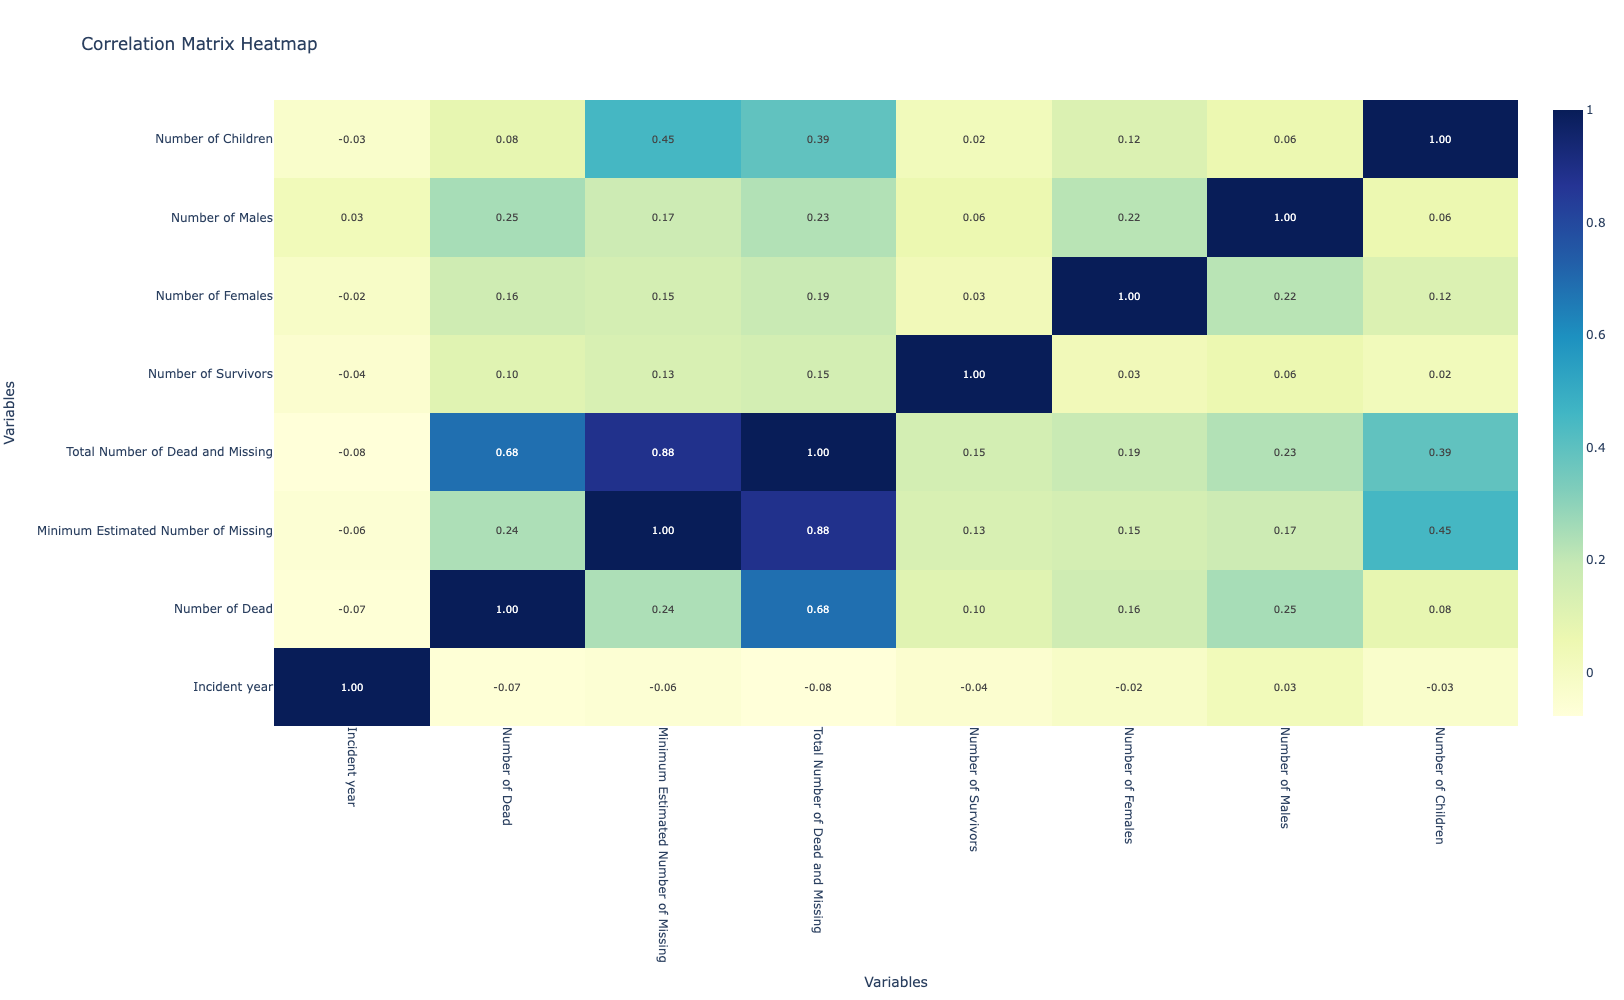

In [7]:
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='YlGnBu',
    texttemplate="%{z:.2f}",
    textfont={"size":10},
))


fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    height=1000,
    width=1000
)

fig.update_xaxes(tickangle=90)
fig.show()


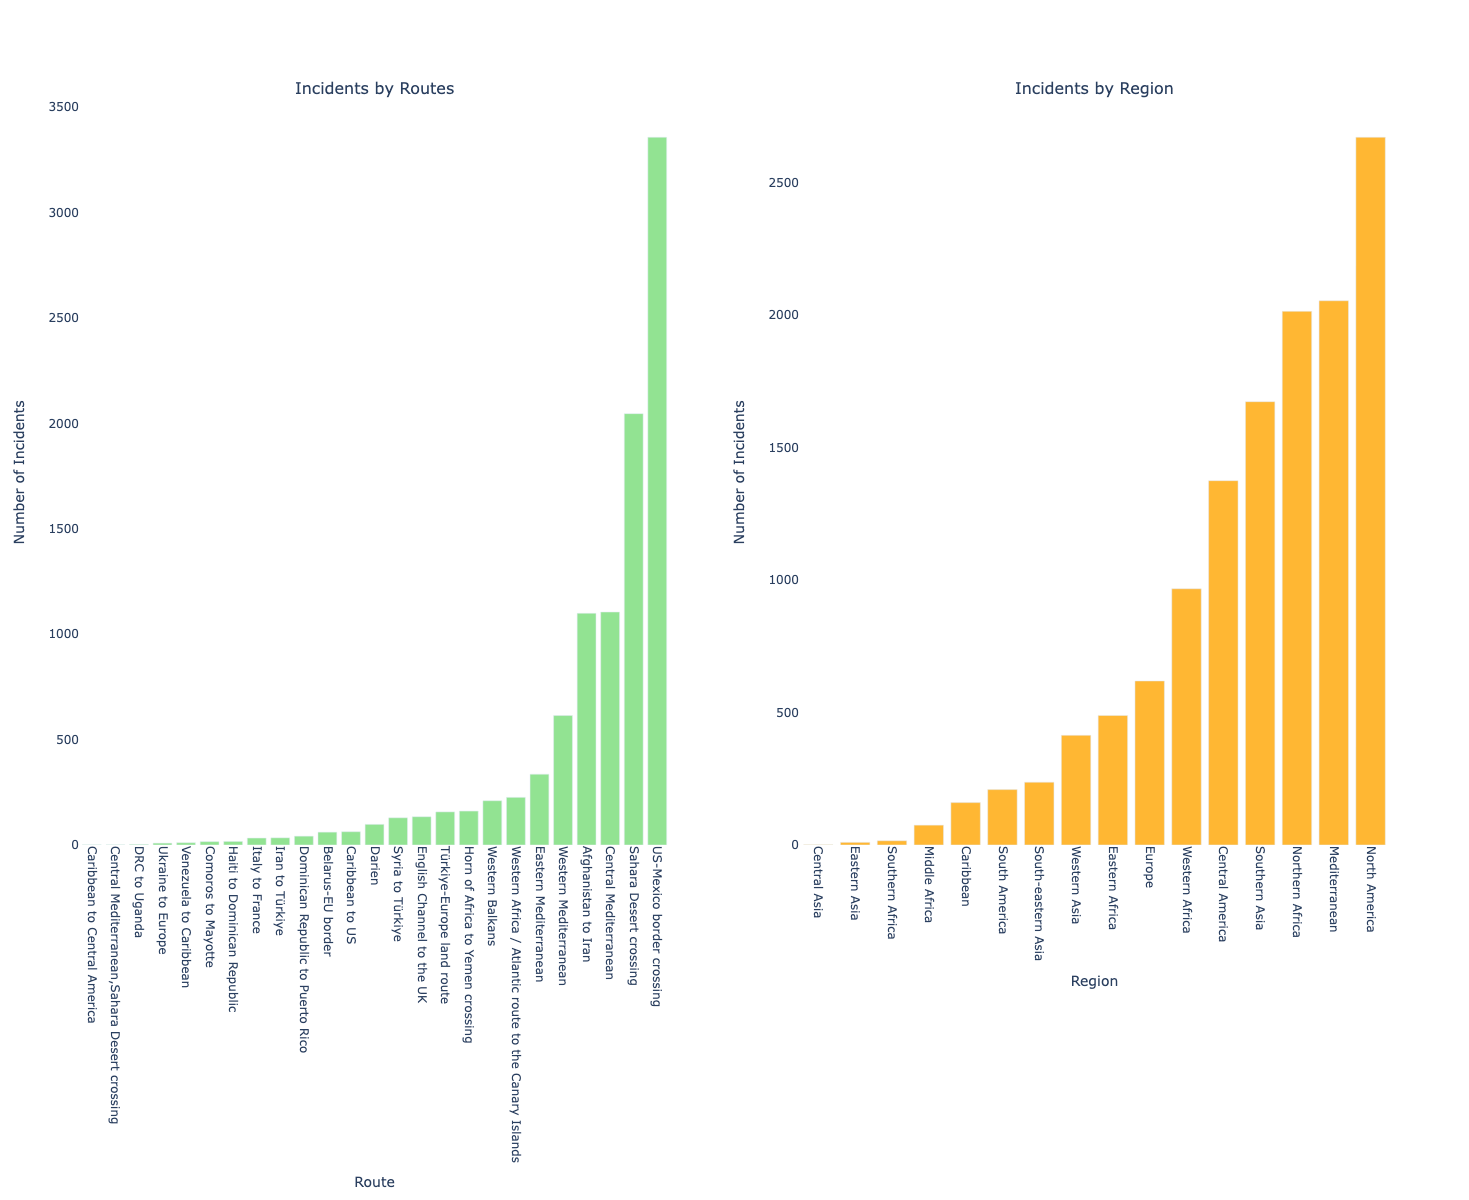

In [51]:
route_incidents = data.groupby('Migration route')['Incident Type'].count().sort_values()
region_incidents = data.groupby('Region of Incident')['Incident Type'].count().sort_values()
fig = make_subplots(rows=1, cols=2, subplot_titles=("Incidents by Routes", "Incidents by Region"))
fig.add_trace(
    go.Bar(x=route_incidents.index, y=route_incidents.values, marker_color='rgba(119, 221, 119, 0.8)'), 
    row=1, col=1
)


fig.add_trace(
    go.Bar(x=region_incidents.index, y=region_incidents.values, marker_color='rgba(255, 165, 0, 0.8)'), 
    row=1, col=2
)

fig.update_layout(
    height=1200, 
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)', # Transparent background
    paper_bgcolor='rgba(0,0,0,0)', # Transparent paper background
)

fig.update_xaxes(title_text="Route", row=1, col=1, tickangle=90)
fig.update_yaxes(title_text="Number of Incidents", row=1, col=1)
fig.update_xaxes(title_text="Region", row=1, col=2, tickangle=90)
fig.update_yaxes(title_text="Number of Incidents", row=1, col=2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [11]:
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data = data.dropna(subset=['Latitude', 'Longitude'])

In [12]:
geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
data = GeoDataFrame(data, geometry=geometry)

In [13]:
data.crs = "EPSG:4326"
data = data.to_crs(epsg=3857)

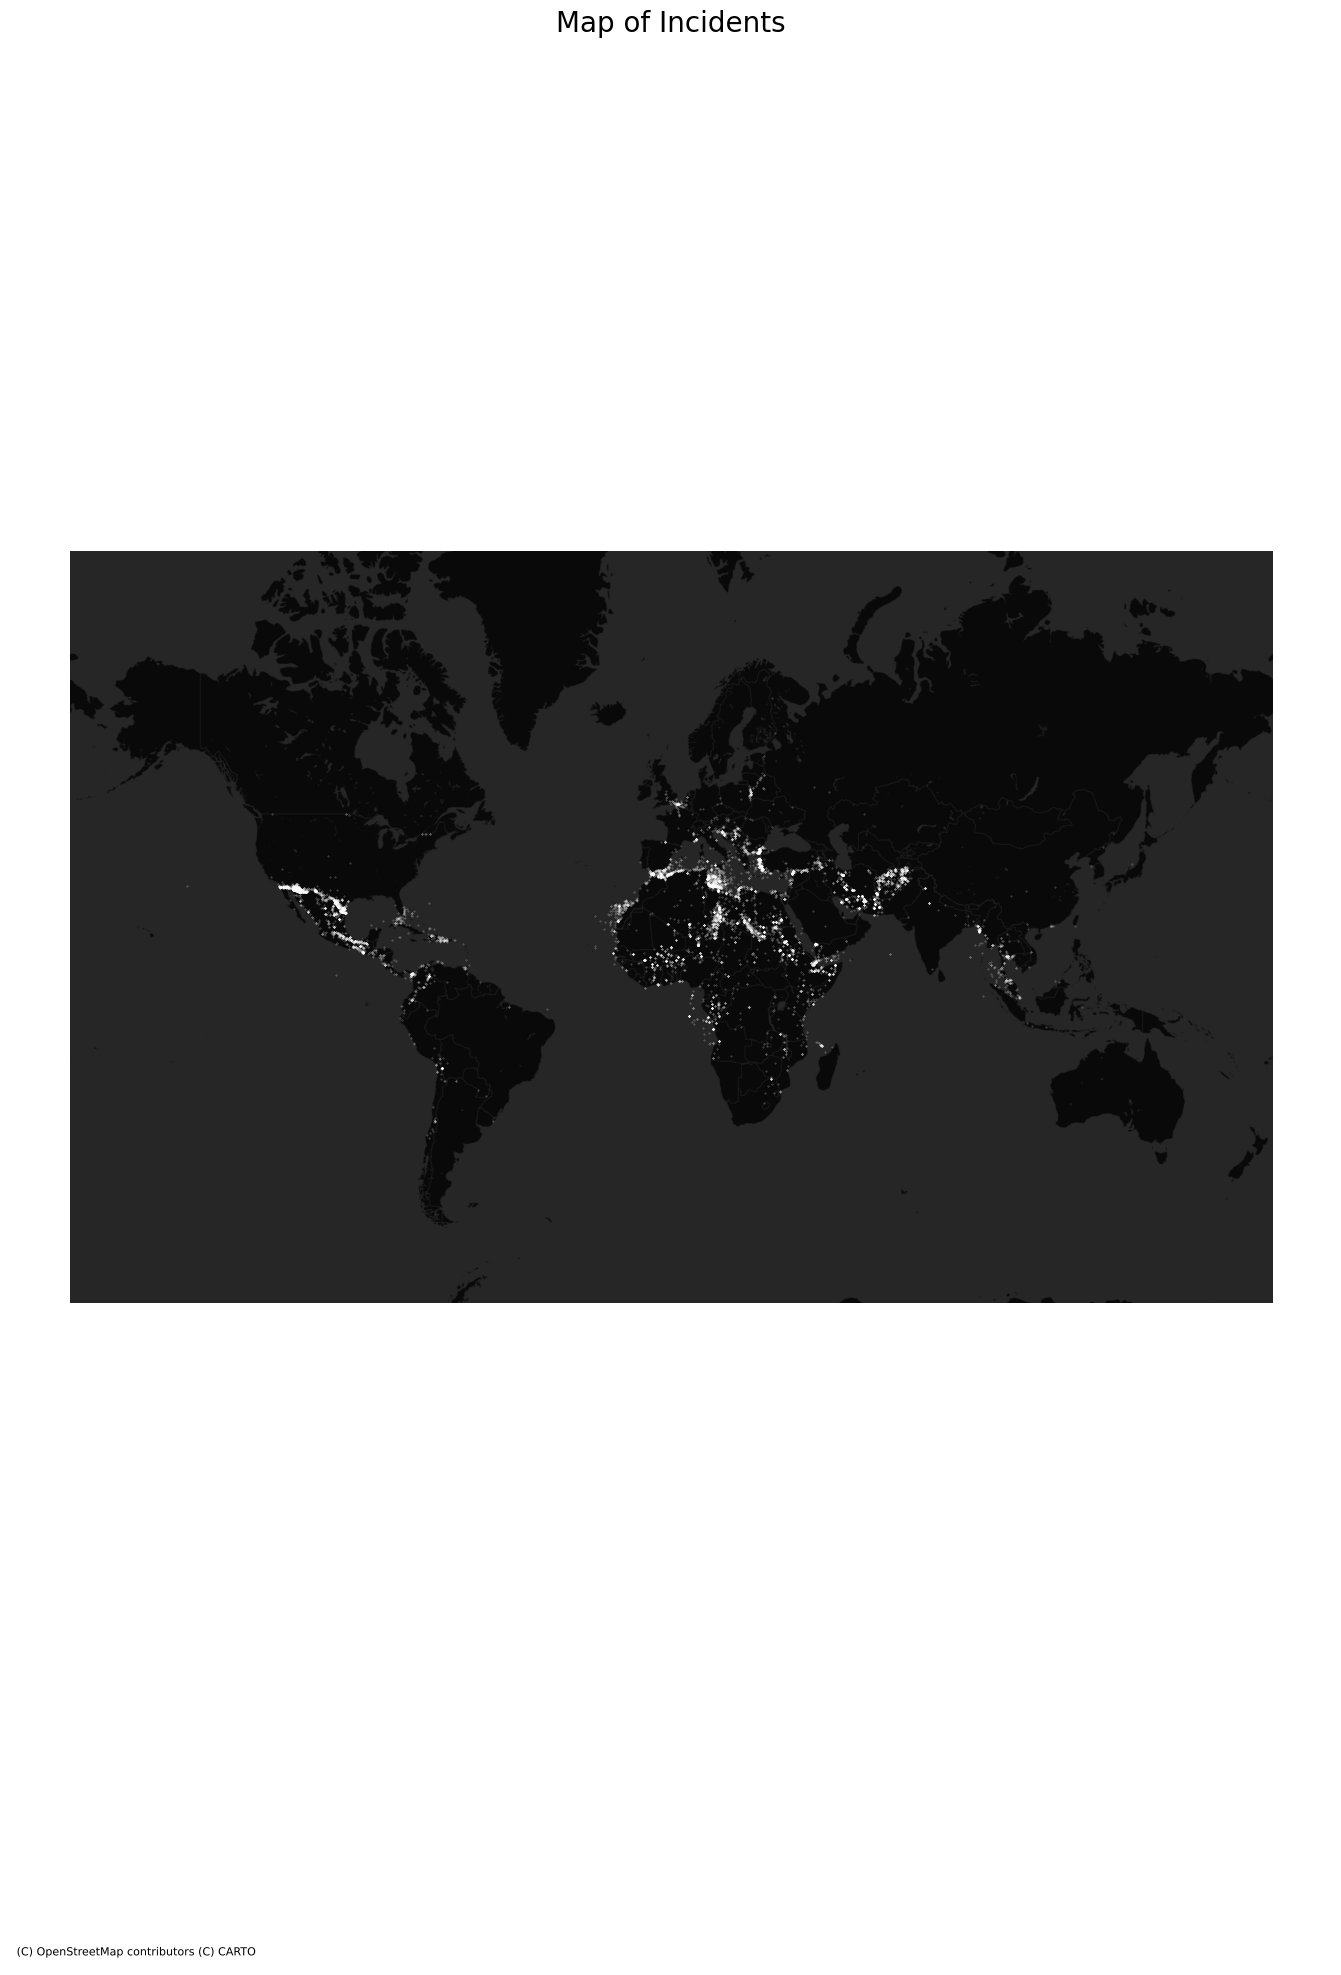

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 25))
data.plot(ax=ax, color='white', alpha=0.4, markersize=0.1)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)

ax.set_xlim(-20026376.39 * 1.1, 20026376.39 * 1.1)
ax.set_ylim(-20048966.10 * 1.6, 20048966.10 * 1.6)

ax.set_title('Map of Incidents', fontdict={'fontsize': 20}, loc='center')
ax.set_axis_off()
plt.savefig("/Users/cyberhbliu/Desktop/30daymapchallenge/11 retro/incidents.svg") 
plt.show()

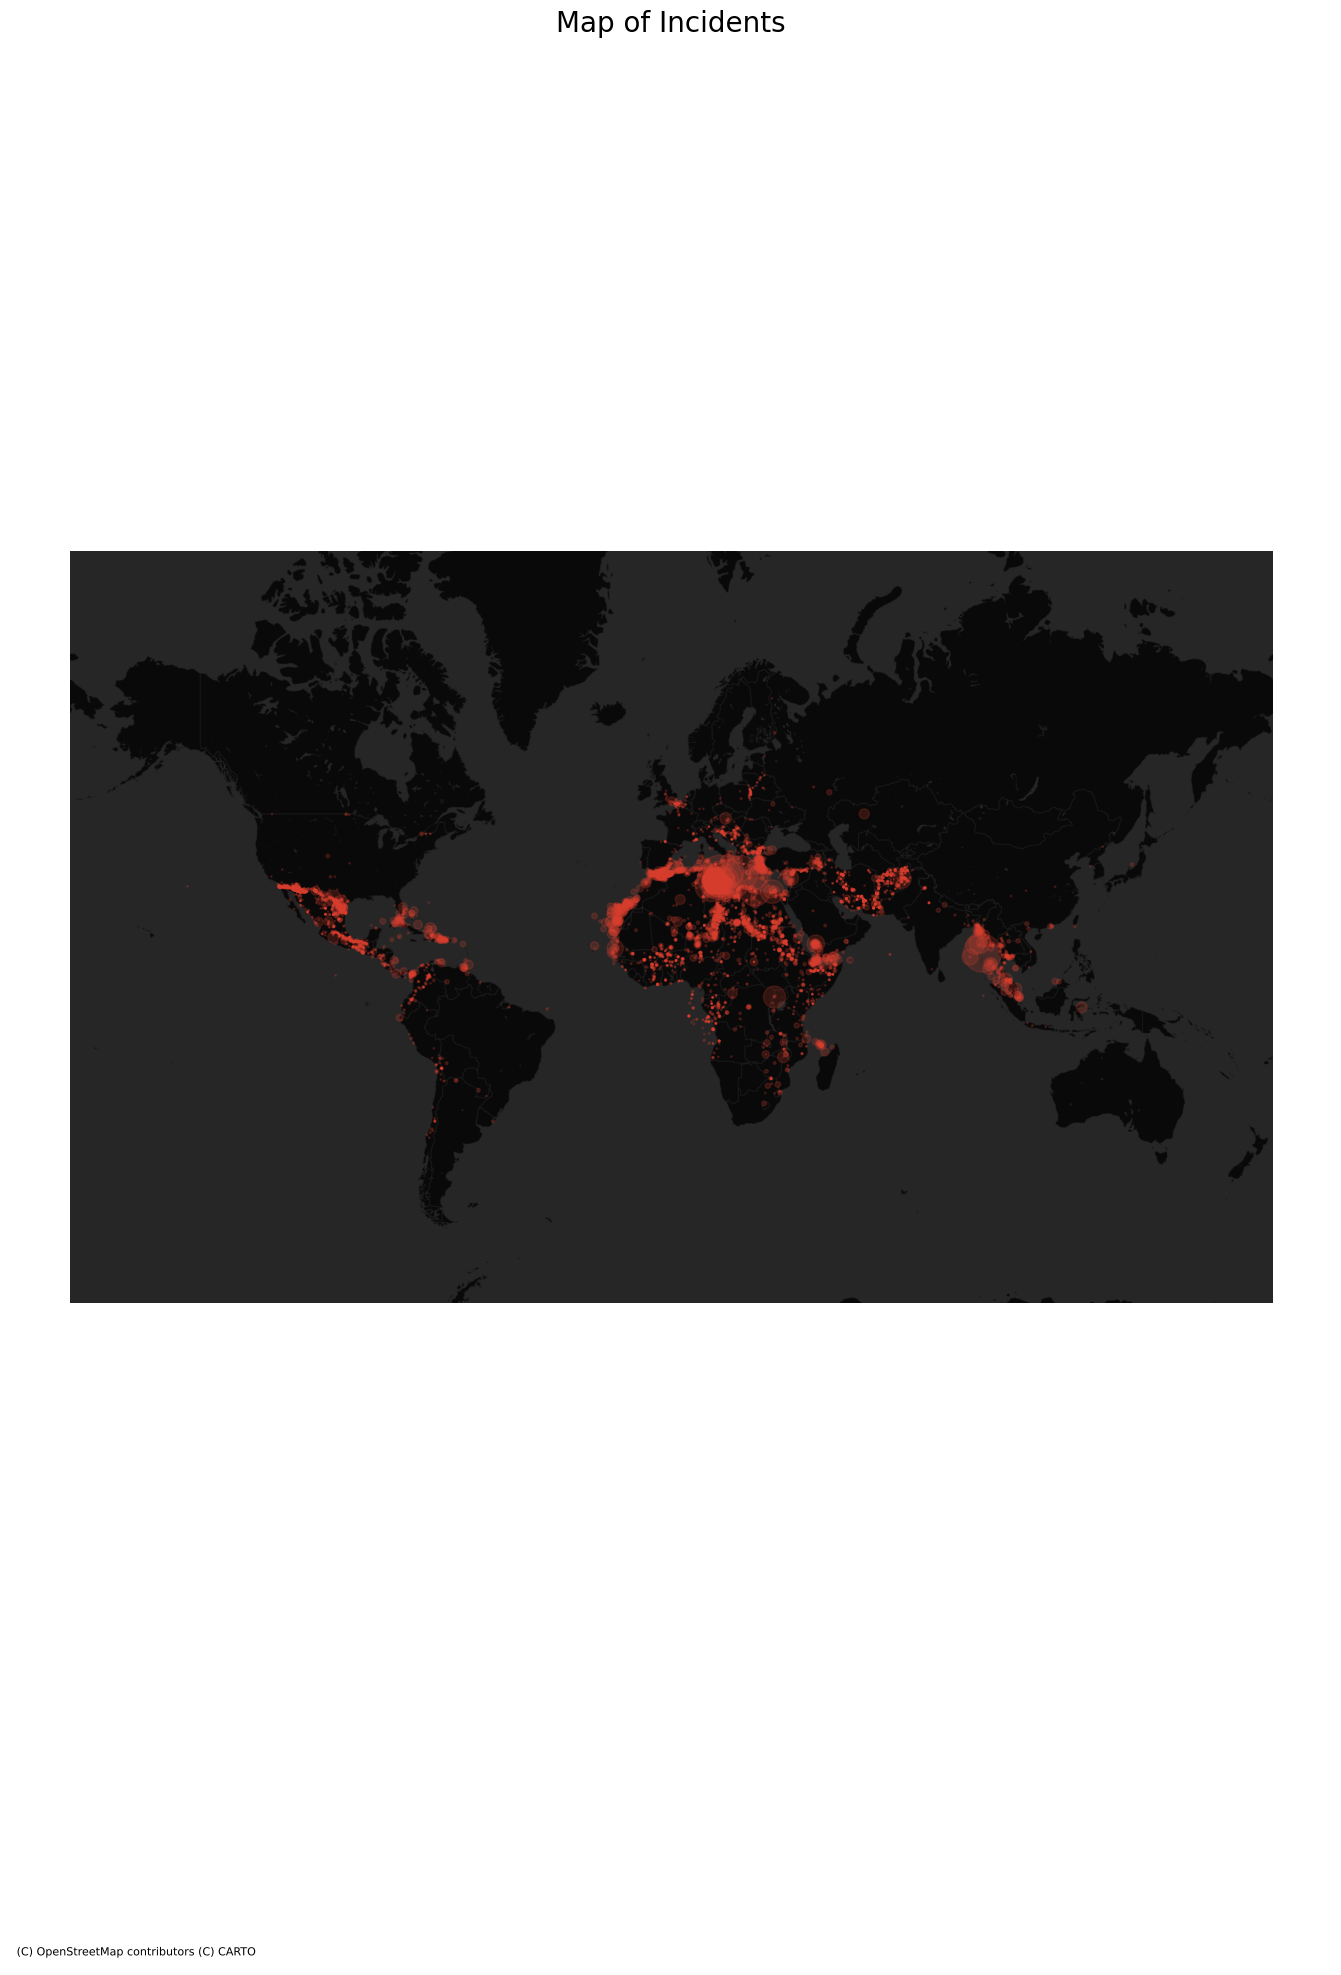

In [64]:
data_wm = data.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 25))

# Scatter plot where the size of each point is determined by 'Total Number of Dead and Missing'
# Make sure to adjust 's' parameter as per your data for appropriate sizing of points
ax.scatter(data_wm.geometry.x, data_wm.geometry.y, s=data_wm['Total Number of Dead and Missing'], color='#db4131', alpha=0.2)

# Add the base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)

# Set the axis limits
ax.set_xlim(-20026376.39 * 1.1, 20026376.39 * 1.1)
ax.set_ylim(-20048966.10 * 1.6, 20048966.10 * 1.6)

# Set the title and remove axis ticks and labels
ax.set_title('Map of Incidents', fontdict={'fontsize': 20}, loc='center')
ax.set_axis_off()

plt.savefig("/Users/cyberhbliu/Desktop/30daymapchallenge/11 retro/incidents_size.svg") 
plt.show()


In [50]:
data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a map object centered on the median of the Latitude and Longitude
m = folium.Map(location=[data['Latitude'].median(), data['Longitude'].median()], 
               zoom_start=3,
               tiles='Cartodb dark_matter')

# Create a list of coordinates and weights
heat_data = [[row['Latitude'], row['Longitude'], row['Total Number of Dead and Missing']] for index, row in data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)
m
